In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movies.csv')

In [4]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
df.shape

(9999, 9)

In [7]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [12]:
df[["GENRE" ,"ONE-LINE" ,"STARS"]] = df[["GENRE" ,"ONE-LINE" ,"STARS"]].replace('[^a-zA-Z0-9 ]','')
df["GENRE"]=df["GENRE"].str.replace("\n","").str.strip()
df["ONE-LINE"]=df["ONE-LINE"].str.replace("\n","").str.strip()
df["STARS"]=df["STARS"].str.replace("\n","").str.strip()

In [14]:
df['STARS']

0       Director:Peter Thorwarth|     Stars:Peri Baume...
1       Stars:Chris Wood, Sarah Michelle Gellar, Lena ...
2       Stars:Andrew Lincoln, Norman Reedus, Melissa M...
3       Stars:Justin Roiland, Chris Parnell, Spencer G...
4       Director:Matthias Schweighöfer|     Stars:Matt...
                              ...                        
9994    Stars:Morgan Taylor Campbell, Chris Cope, Iñak...
9995                                                     
9996    Director:Orlando von Einsiedel|     Star:Princ...
9997    Director:Jovanka Vuckovic|     Stars:Morgan Ta...
9998    Director:Jovanka Vuckovic|     Stars:Morgan Ta...
Name: STARS, Length: 9999, dtype: object

In [15]:
def extract_info(s):
    s = s.replace('..', '').strip()
    info = {'Director': '', 'Stars': ''}

    parts = [p.strip() for p in s.split('|')]
    for part in parts:
        if part.startswith('Director:') or part.startswith('Directors:'):
            info['Director'] = part.split(':', 1)[1].strip()
        elif part.startswith('Star:') or part.startswith('Stars:'):
            info['Stars'] = part.split(':', 1)[1].strip()
    
    return pd.Series(info)

df[['Director', 'Stars']] = df['STARS'].apply(extract_info)

df[['STARS','Director','Stars']].head()

,STARS,Director,Stars
0,Director:Peter Thorwarth| Stars:Peri Baume...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Parnell, Spencer G...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:Matt...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [16]:
df.drop(columns="STARS",inplace=True)
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RunTime,Gross,Director,Stars
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"21,062",121.0,NaN,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"17,870",25.0,NaN,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"885,805",44.0,NaN,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"414,849",23.0,NaN,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",NaN,NaN,NaN,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [24]:
df['VOTES']

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            0.0
          ...   
9994         0.0
9995         0.0
9996         0.0
9997         0.0
9998         0.0
Name: VOTES, Length: 9999, dtype: float64

In [19]:
df['VOTES'] = df['VOTES'].astype(str).str.replace(',', '').str.strip()

In [23]:
df['VOTES'] = pd.to_numeric(df['VOTES'], errors='coerce')
df['VOTES']=df['VOTES'].fillna(0)

In [26]:
df['Gross'].value_counts()

Gross
$0.01M     22
$0.02M     16
$0.00M     15
$0.03M     10
$0.04M      9
           ..
$37.77M     1
$44.82M     1
$21.36M     1
$54.76M     1
$10.40M     1
Name: count, Length: 332, dtype: int64

In [28]:
def clean_val(val):
    if isinstance(val, str):
        val = val.strip("$").upper()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif 'B' in val:
            return float(val.replace('B', '')) * 1_000_000_000
        else:
            try:
                return float(val.replace(',', ''))
            except:
                return None
    return None

df['Gross']=df['Gross'].apply(clean_val)
df['Gross']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
Name: Gross, Length: 9999, dtype: float64

In [29]:
df['Gross']=df['Gross'].fillna(0)
df['Gross']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9994    0.0
9995    0.0
9996    0.0
9997    0.0
9998    0.0
Name: Gross, Length: 9999, dtype: float64

C:\Users\piyush.athawale\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gross', ylabel='Count'>

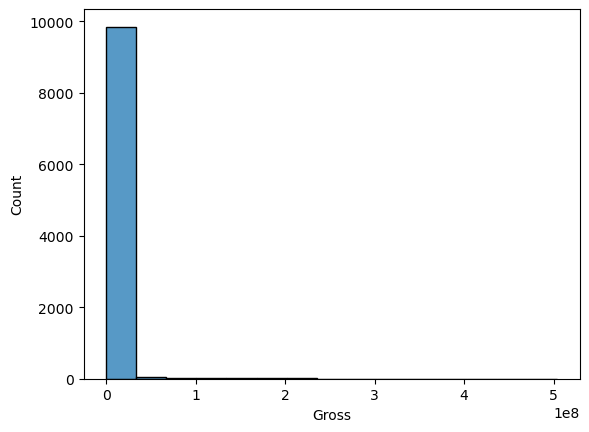

In [30]:
sns.histplot(data=df,x='Gross')

In [38]:
df = pd.read_csv("Housing.csv")

In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [41]:
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)


In [42]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [43]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
             'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
             'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
y = df['price']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=54)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(np.array([330,2,)

In [49]:
mse = mean_squared_error(y_test,y_pred)
mse

748404263918.0328

In [50]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 258.83
bedrooms: 79782.89
bathrooms: 938499.68
stories: 483694.69
parking: 295116.19
mainroad_yes: 410893.38
guestroom_yes: 291632.45
basement_yes: 467772.80
hotwaterheating_yes: 859918.57
airconditioning_yes: 903303.76
prefarea_yes: 629400.49
furnishingstatus_semi-furnished: -11032.47
furnishingstatus_unfurnished: -408485.67
Intercept: 36359.02
